### MODEL DEFINITION AND MODEL TRAINING

#### RESULTS

| Algorithm      | MSE | RMSE | R2 |
|----------------|-----|------|----|
|Linear Regression | 2.716  | 1.648 | 0.982 |
|Extra Trees Regressor | 0.611 | 0.782 | 0.996 |
|XGBoost Regressor |2.128 | 1.489 | 0.985  |

#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

#import pickle
#from pickle import dump, load

np.random.seed(0)

#from pycaret.regression import *

pd.set_option('display.max_columns',50)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

In [3]:
df = pd.read_csv("packersELOdata.csv")

In [4]:
df.head()

,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1,qb2,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1966,0,NaN,GB,IND,1617.725,1586.751,0.634709,0.365291,1639.363,1565.112,1606.881656,1608.973916,Bart Starr,Johnny Unitas,92.009419,162.344426,-3.540764,9.874700,0.558534,0.441466,184.927540,-12.850207,101.301231,144.824963,1633.675841,1582.179732,24,3,92.0,NaN,NaN
1,1966,0,NaN,CLE,GB,1582.318,1639.363,0.511446,0.488554,1575.202,1646.479,1582.851078,1633.675841,Frank Ryan,Bart Starr,94.381489,101.301231,3.637616,1.282180,0.511599,0.488401,234.218385,281.641138,108.365178,119.335222,1575.732732,1640.794187,20,21,92.0,NaN,NaN
2,1966,0,NaN,GB,LAR,1646.479,1516.079,0.754880,0.245120,1657.668,1504.891,1640.794187,1498.258347,Bart Starr,Roman Gabriel,119.335222,135.732348,10.235067,16.700544,0.752049,0.247951,254.456288,17.597618,132.847329,123.918875,1652.124194,1486.928340,24,13,84.0,NaN,NaN
3,1966,0,NaN,GB,DET,1657.668,1492.499,0.790006,0.209994,1666.422,1483.744,1652.124194,1502.172537,Bart Starr,Milt Plum,132.847329,50.923903,16.479367,-4.212413,0.786785,0.213215,226.626882,75.220927,142.225284,53.353606,1661.025416,1493.271314,23,14,84.0,NaN,NaN
4,1966,0,NaN,SF,GB,1469.961,1666.422,0.319352,0.680648,1479.997,1656.387,1463.972498,1661.025416,George Mira,Bart Starr,25.383454,142.225284,-98.523058,20.344376,0.188508,0.811492,152.244406,244.499884,38.069549,152.452744,1476.687776,1648.310139,21,20,52.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          916 non-null    int64  
 1   neutral         916 non-null    int64  
 2   playoff         51 non-null     object 
 3   team1           916 non-null    object 
 4   team2           916 non-null    object 
 5   elo1_pre        916 non-null    float64
 6   elo2_pre        916 non-null    float64
 7   elo_prob1       916 non-null    float64
 8   elo_prob2       916 non-null    float64
 9   elo1_post       916 non-null    float64
 10  elo2_post       916 non-null    float64
 11  qbelo1_pre      916 non-null    float64
 12  qbelo2_pre      916 non-null    float64
 13  qb1             916 non-null    object 
 14  qb2             916 non-null    object 
 15  qb1_value_pre   916 non-null    float64
 16  qb2_value_pre   916 non-null    float64
 17  qb1_adj         916 non-null    flo

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          916 non-null    int64  
 1   neutral         916 non-null    int64  
 2   playoff         916 non-null    object 
 3   team1           916 non-null    object 
 4   team2           916 non-null    object 
 5   elo1_pre        916 non-null    float64
 6   elo2_pre        916 non-null    float64
 7   elo_prob1       916 non-null    float64
 8   elo_prob2       916 non-null    float64
 9   elo1_post       916 non-null    float64
 10  elo2_post       916 non-null    float64
 11  qbelo1_pre      916 non-null    float64
 12  qbelo2_pre      916 non-null    float64
 13  qb1             916 non-null    object 
 14  qb2             916 non-null    object 
 15  qb1_value_pre   916 non-null    float64
 16  qb2_value_pre   916 non-null    float64
 17  qb1_adj         916 non-null    flo

In [14]:
df.drop(['playoff', 'team1', 'team2', 'qb1', 'qb2'],axis=1,inplace=True)

In [16]:
df.head()

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1966,0,1617.725,1586.751,0.634709,0.365291,1639.363,1565.112,1606.881656,1608.973916,92.009419,162.344426,-3.540764,9.874700,0.558534,0.441466,184.927540,-12.850207,101.301231,144.824963,1633.675841,1582.179732,24,3,92.0,0.0,0.0
1,1966,0,1582.318,1639.363,0.511446,0.488554,1575.202,1646.479,1582.851078,1633.675841,94.381489,101.301231,3.637616,1.282180,0.511599,0.488401,234.218385,281.641138,108.365178,119.335222,1575.732732,1640.794187,20,21,92.0,0.0,0.0
2,1966,0,1646.479,1516.079,0.754880,0.245120,1657.668,1504.891,1640.794187,1498.258347,119.335222,135.732348,10.235067,16.700544,0.752049,0.247951,254.456288,17.597618,132.847329,123.918875,1652.124194,1486.928340,24,13,84.0,0.0,0.0
3,1966,0,1657.668,1492.499,0.790006,0.209994,1666.422,1483.744,1652.124194,1502.172537,132.847329,50.923903,16.479367,-4.212413,0.786785,0.213215,226.626882,75.220927,142.225284,53.353606,1661.025416,1493.271314,23,14,84.0,0.0,0.0
4,1966,0,1469.961,1666.422,0.319352,0.680648,1479.997,1656.387,1463.972498,1661.025416,25.383454,142.225284,-98.523058,20.344376,0.188508,0.811492,152.244406,244.499884,38.069549,152.452744,1476.687776,1648.310139,21,20,52.0,0.0,0.0


In [18]:
df

,season,neutral,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,qbelo1_pre,qbelo2_pre,qb1_value_pre,qb2_value_pre,qb1_adj,qb2_adj,qbelo_prob1,qbelo_prob2,qb1_game_value,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1966,0,1617.725000,1586.751000,0.634709,0.365291,1639.363000,1565.112000,1606.881656,1608.973916,92.009419,162.344426,-3.540764,9.874700,0.558534,0.441466,184.927540,-12.850207,101.301231,144.824963,1633.675841,1582.179732,24,3,92.0,0.0,0.0
1,1966,0,1582.318000,1639.363000,0.511446,0.488554,1575.202000,1646.479000,1582.851078,1633.675841,94.381489,101.301231,3.637616,1.282180,0.511599,0.488401,234.218385,281.641138,108.365178,119.335222,1575.732732,1640.794187,20,21,92.0,0.0,0.0
2,1966,0,1646.479000,1516.079000,0.754880,0.245120,1657.668000,1504.891000,1640.794187,1498.258347,119.335222,135.732348,10.235067,16.700544,0.752049,0.247951,254.456288,17.597618,132.847329,123.918875,1652.124194,1486.928340,24,13,84.0,0.0,0.0
3,1966,0,1657.668000,1492.499000,0.790006,0.209994,1666.422000,1483.744000,1652.124194,1502.172537,132.847329,50.923903,16.479367,-4.212413,0.786785,0.213215,226.626882,75.220927,142.225284,53.353606,1661.025416,1493.271314,23,14,84.0,0.0,0.0
4,1966,0,1469.961000,1666.422000,0.319352,0.680648,1479.997000,1656.387000,1463.972498,1661.025416,25.383454,142.225284,-98.523058,20.344376,0.188508,0.811492,152.244406,244.499884,38.069549,152.452744,1476.687776,1648.310139,21,20,52.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021,0,1571.269003,1669.434523,0.452415,0.547585,1565.090339,1675.613188,1571.771422,1644.588760,3.343388,257.968760,-174.193487,18.609774,0.232091,0.767909,447.231253,272.802876,47.732175,259.452172,1568.831705,1647.528477,30,31,58.0,89.0,74.0
912,2021,0,1675.613188,1508.198319,0.792142,0.207858,1679.743906,1504.067601,1647.528477,1522.642954,259.452172,114.951431,18.420991,-18.912013,0.778892,0.221108,290.001903,-98.544019,262.507145,93.601886,1651.947347,1518.224084,24,22,84.0,78.0,81.0
913,2021,0,1679.743906,1514.681059,0.789904,0.210096,1692.419962,1502.005003,1651.947347,1503.382525,262.507145,60.175799,19.027428,-135.929831,0.887928,0.112072,343.261603,138.669473,270.582591,68.025166,1658.367116,1496.962756,37,10,51.0,19.0,35.0
914,2021,0,1315.123093,1692.419962,0.142128,0.857872,1356.703438,1650.839616,1318.922234,1658.367116,142.319883,270.582591,5.323214,22.113780,0.428447,0.571553,246.542291,113.312705,152.742124,254.855602,1318.922234,1658.367116,37,30,38.0,1.0,20.0


In [20]:
X = df.iloc[:,0:26]
y = df.iloc[:,26]

In [21]:
X.values, y.values

(array([[1966.        ,    0.        , 1617.725     , ...,    3.        ,
           92.        ,    0.        ],
        [1966.        ,    0.        , 1582.318     , ...,   21.        ,
           92.        ,    0.        ],
        [1966.        ,    0.        , 1646.479     , ...,   13.        ,
           84.        ,    0.        ],
        ...,
        [2021.        ,    0.        , 1679.74390585, ...,   10.        ,
           51.        ,   19.        ],
        [2021.        ,    0.        , 1315.12309293, ...,   30.        ,
           38.        ,    1.        ],
        [2021.        ,    0.        , 1650.8396161 , ...,   13.        ,
           97.        ,  100.        ]]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((687, 26), (229, 26), (687,), (229,))

#### LINEAR REGRESSION

In [24]:
lr = LinearRegression()

In [25]:
model1 = lr.fit(X_train,y_train)

In [26]:
model1

LinearRegression()

In [27]:
lrprediction = model1.predict(X_test)

In [28]:
lrprediction

array([-0.50617479,  0.58632221, -0.00845237, -0.12650259, -0.38999534,
       -0.07153904, -0.39774978, 75.14793095, -0.05096875, -0.1962658 ,
        0.6032193 ,  0.27343961,  0.49944205,  0.3480648 ,  0.36788274,
        0.1148796 ,  0.39922055, -0.11857175, -0.30922415,  0.17621787,
        0.41500565, -0.02059105, -0.02830539, -0.20717206, -0.15747795,
        0.46057552,  0.26330315, -0.20951794, -0.19031756,  0.06450557,
        0.11768019,  0.1628855 , -0.4009022 , -0.05611932,  0.46316553,
       -0.82939475,  0.03579113, -0.22547121, -0.07420937,  0.16479147,
        0.64348598, -0.38045563, -0.07406352,  0.01332346,  0.69720119,
        0.48523502,  0.2251451 , -0.16771061,  0.08844512,  0.34685527,
        0.67320644,  0.63203646,  0.42814087, 57.57292365, -0.12689022,
       -0.03195396, -0.34167314,  0.38209377, -0.23481123,  0.21935058,
        0.19441247, -0.00462579, -0.31834049,  0.29683573,  0.45030272,
        0.07797852,  0.32461487, -0.56513965,  0.06898055, -0.15

In [29]:
lrprediction.round()

array([-1.,  1., -0., -0., -0., -0., -0., 75., -0., -0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,
        0., -0., -0.,  0.,  0.,  0., -0., -0.,  0., -1.,  0., -0., -0.,
        0.,  1., -0., -0.,  0.,  1.,  0.,  0., -0.,  0.,  0.,  1.,  1.,
        0., 58., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
        0.,  0., -1.,  0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  1.,
        0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,  1., -0.,  0., -0.,
       -0.,  0.,  0., -1., -0.,  0., -0., -1., -1.,  0., -0.,  2., -0.,
        0.,  0.,  1.,  0.,  1., -0.,  0., -0., -0., 71.,  0., -0.,  1.,
        0., -0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,  1., -1.,  1.,
        1., 79.,  0., -0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  1.,  0., -1., -0., -1.,
        0.,  0., -0.,  0.,  1.,  0.,  1.,  0., -0.,  0.,  0.,  0.,  1.,
        0.,  0., -0., -0., -1.,  1.,  0.,  0.,  0., 68.,  1., -1

##### MODEL EVALUATION

In [32]:
mse = mean_squared_error(y_test,lrprediction.round())
mse

2.7161572052401746

In [33]:
rmse = np.sqrt(mse)
rmse

1.648076820187753

In [34]:
r2score = r2_score(y_test,lrprediction.round())
r2score

0.9822447693383154

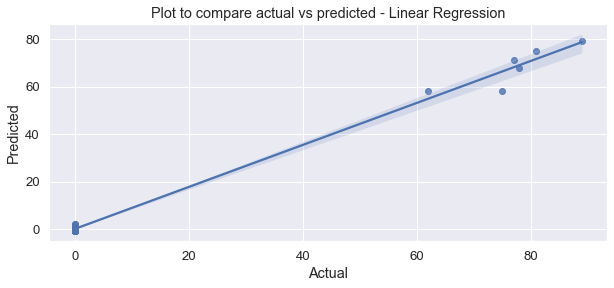

In [35]:
fig, ax = plt.subplots(figsize=(10,4))
sns.regplot(x=y_test, y=lrprediction.round(), ax=ax)
plt.title("Plot to compare actual vs predicted - Linear Regression")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

#### EXTRA TREES REGRESSOR

In [36]:
et = ExtraTreesRegressor()

In [37]:
model2 = et.fit(X_train,y_train)

In [38]:
model2

ExtraTreesRegressor()

In [39]:
etprediction = model2.predict(X_test)

In [40]:
etprediction

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 76.88,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  , 70.35,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  , 74.37,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,

In [41]:
etprediction.round()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0., 77.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 74.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., 84.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 74.,  0.,  0

##### MODEL EVALUATION

In [42]:
mse = mean_squared_error(y_test,etprediction.round())
mse

0.611353711790393

In [43]:
rmse = np.sqrt(mse)
rmse

0.7818911124897079

In [44]:
r2score = r2_score(y_test,etprediction.round())
r2score

0.9960036458317751

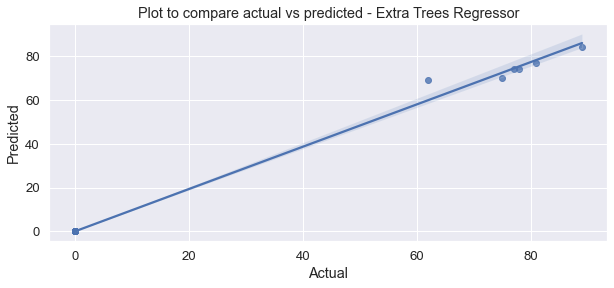

In [45]:
fig, ax = plt.subplots(figsize=(10,4))
sns.regplot(x=y_test, y=etprediction.round(), ax=ax)
plt.title("Plot to compare actual vs predicted - Extra Trees Regressor")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

#### XGBOOST (SCIKIT-LEARN) RANDOMSEARCHCV

In [46]:
model3 = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [47]:
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [48]:
randm = RandomizedSearchCV(estimator=model3, param_distributions = parameters, cv = 5, n_iter = 20, 
                           n_jobs=-1, scoring='neg_root_mean_squared_error')

In [49]:
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                        'gamma': array([0, 2, 4, 6, 8]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'reg_lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8])},
                   scoring='neg_root_mean_squared_error')

In [50]:
randm.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
             enable_categorical=False, eta=0.05, eval_metric=None, gamma=2,
             gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.0500000007,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=800, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.7000000000000001, ...)

In [51]:
randm.best_score_

-1.4095362365690354

In [52]:
randm.best_params_

{'subsample': 0.5,
 'reg_lambda': 0.8,
 'reg_alpha': 0.7000000000000001,
 'n_estimators': 800,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 2,
 'eta': 0.05,
 'colsample_bytree': 0.7999999999999999}

##### FINAL MODEL

In [53]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=400, objective='reg:squarederror',
                       subsample=0.5,reg_lambda=0.3,reg_alpha=0.7,min_child_weight=3,max_depth=5,
                       gamma=4, eta=0.05,colsample_bytree=0.6)

In [54]:
xgbmodel.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:12.44881
[1]	validation_0-rmse:12.00769
[2]	validation_0-rmse:11.51187
[3]	validation_0-rmse:11.08284
[4]	validation_0-rmse:10.54943
[5]	validation_0-rmse:10.16763
[6]	validation_0-rmse:10.13597
[7]	validation_0-rmse:9.80488
[8]	validation_0-rmse:9.53588
[9]	validation_0-rmse:9.51464
[10]	validation_0-rmse:9.43175
[11]	validation_0-rmse:8.96516
[12]	validation_0-rmse:8.75272
[13]	validation_0-rmse:8.45419
[14]	validation_0-rmse:8.12402
[15]	validation_0-rmse:7.97269
[16]	validation_0-rmse:7.91037
[17]	validation_0-rmse:7.58363
[18]	validation_0-rmse:7.22321
[19]	validation_0-rmse:7.09325
[20]	validation_0-rmse:6.83164
[21]	validation_0-rmse:6.64972
[22]	validation_0-rmse:6.42248
[23]	validation_0-rmse:6.14401
[24]	validation_0-rmse:6.02474
[25]	validation_0-rmse:5.82018
[26]	validation_0-rmse:5.55855
[27]	validation_0-rmse:5.44287
[28]	validation_0-rmse:5.45196
[29]	validation_0-rmse:5.24483
[30]	validation_0-rmse:5.07680
[31]	validation_0-rmse:4.93260
[32]	valida

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False, eta=0.05,
             eval_metric=None, gamma=4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0500000007, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.7, ...)

In [55]:
y_pred = xgbmodel.predict(X_test)

In [56]:
y_pred

array([-0.03204667, -0.28304982, -0.07079   , -0.15593782, -0.03204667,
       -0.03204667,  1.0791378 , 71.90405   , -0.03204667, -0.13971676,
       -0.03204667,  0.03507817, -0.11858872, -0.03204667, -0.18523751,
       -0.03204667, -0.11858872, -0.03204667, -0.03204667,  0.6543481 ,
       -0.11972018, -0.04493409, -0.03204667, -0.14041549, -0.03204667,
        0.8004416 , -0.23361622, -0.03204667, -0.04947894, -0.03204667,
        0.03348095,  0.04395517, -0.02432399, -0.03288813, -0.02245283,
       -0.11858872, -0.03204667, -0.03204667, -0.03204667, -0.08241646,
        2.0098898 , -0.03204667, -0.03204667, -0.07655668, -0.01053542,
       -0.8555864 , -0.03204667, -0.05139922, -0.05706795, -0.03204667,
        0.2136239 , -0.03368833, -0.03575826, 69.173195  ,  0.65882355,
       -0.03204667, -0.03204667, -0.08906703, -0.19161077,  0.06158255,
       -0.0380531 , -0.03204667, -0.03204667, -0.03204667,  0.3768513 ,
       -0.03204667,  1.3179755 , -0.05139922, -0.04218566, -0.03

In [57]:
y_pred.round()

array([-0., -0., -0., -0., -0., -0.,  1., 72., -0., -0., -0.,  0., -0.,
       -0., -0., -0., -0., -0., -0.,  1., -0., -0., -0., -0., -0.,  1.,
       -0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0.,
       -0.,  2., -0., -0., -0., -0., -1., -0., -0., -0., -0.,  0., -0.,
       -0., 69.,  1., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,
       -0.,  1., -0., -0., -0., -0.,  2., -0., -0.,  0., -0., -0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -1., -0.,  2., -0., -0., -0.,
       -0.,  0., -0., -1., -0., -0., -0., -0., -0.,  2., -0.,  1., -0.,
        2., -0., -0., -0., -0., -0., -0., -0., -0., 73., -0.,  0., -0.,
        1.,  1., -0.,  0., -0., -0., -0., -0., -0., -0., -0.,  2., -0.,
        1., 78., -0., -0., -0., -0., -1., -0., -0., -0., -0.,  0.,  0.,
       -0.,  1., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,  1.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., 66., -0., -0

##### MODEL EVALUATION

In [58]:
mse = mean_squared_error(y_test,y_pred)
mse

2.2183753956921066

In [59]:
rmse = np.sqrt(mse)
rmse

1.4894211612878698

In [60]:
r2score = r2_score(y_test,y_pred)
r2score

0.9854987160652079

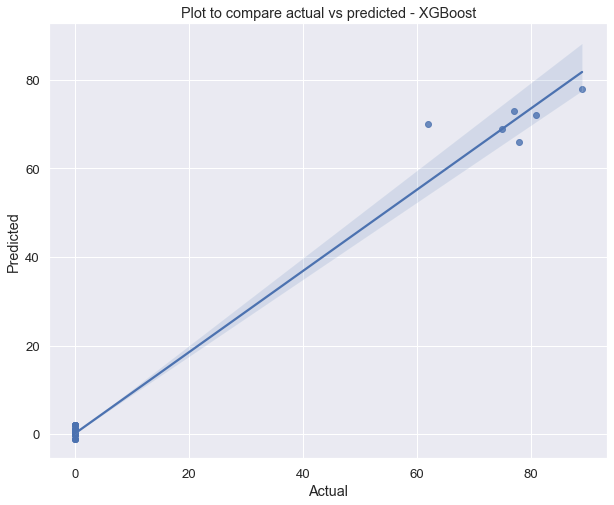

In [61]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred.round(), ax=ax)
plt.title("Plot to compare actual vs predicted - XGBoost")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Plot Feature Importances (Extra Tree and XGBoost)

In [62]:
et.feature_importances_

array([0.01624824, 0.        , 0.00152597, 0.00556855, 0.00493293,
       0.00418531, 0.00006396, 0.00812276, 0.00032887, 0.00147974,
       0.00092005, 0.00022078, 0.00070052, 0.00027517, 0.00062444,
       0.00074857, 0.00071566, 0.00074987, 0.00174302, 0.00002177,
       0.00053182, 0.00370693, 0.00198138, 0.00032914, 0.00407607,
       0.94019846])

In [63]:
feat_importances = pd.Series(et.feature_importances_, index=X.columns)

In [64]:
feat_importances

season            0.016248
neutral           0.000000
elo1_pre          0.001526
elo2_pre          0.005569
elo_prob1         0.004933
elo_prob2         0.004185
elo1_post         0.000064
elo2_post         0.008123
qbelo1_pre        0.000329
qbelo2_pre        0.001480
qb1_value_pre     0.000920
qb2_value_pre     0.000221
qb1_adj           0.000701
qb2_adj           0.000275
qbelo_prob1       0.000624
qbelo_prob2       0.000749
qb1_game_value    0.000716
qb2_game_value    0.000750
qb1_value_post    0.001743
qb2_value_post    0.000022
qbelo1_post       0.000532
qbelo2_post       0.003707
score1            0.001981
score2            0.000329
quality           0.004076
importance        0.940198
dtype: float64

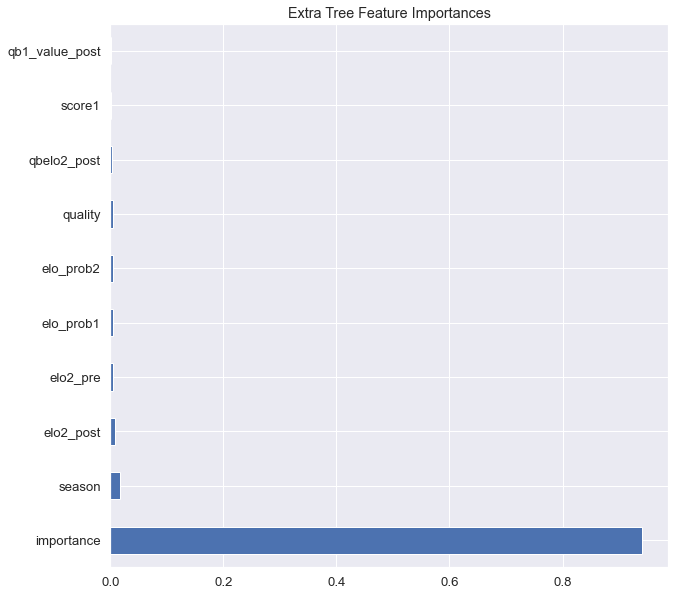

In [65]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Extra Tree Feature Importances')
plt.show()

In [66]:
X.columns

Index(['season', 'neutral', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality', 'importance'], dtype='object')

In [67]:
xgbmodel.get_booster().feature_names = ['season', 'neutral', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post', 'qbelo1_pre', 'qbelo2_pre', 'qb1_value_pre', 'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2', 'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post', 'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality', 'importance']

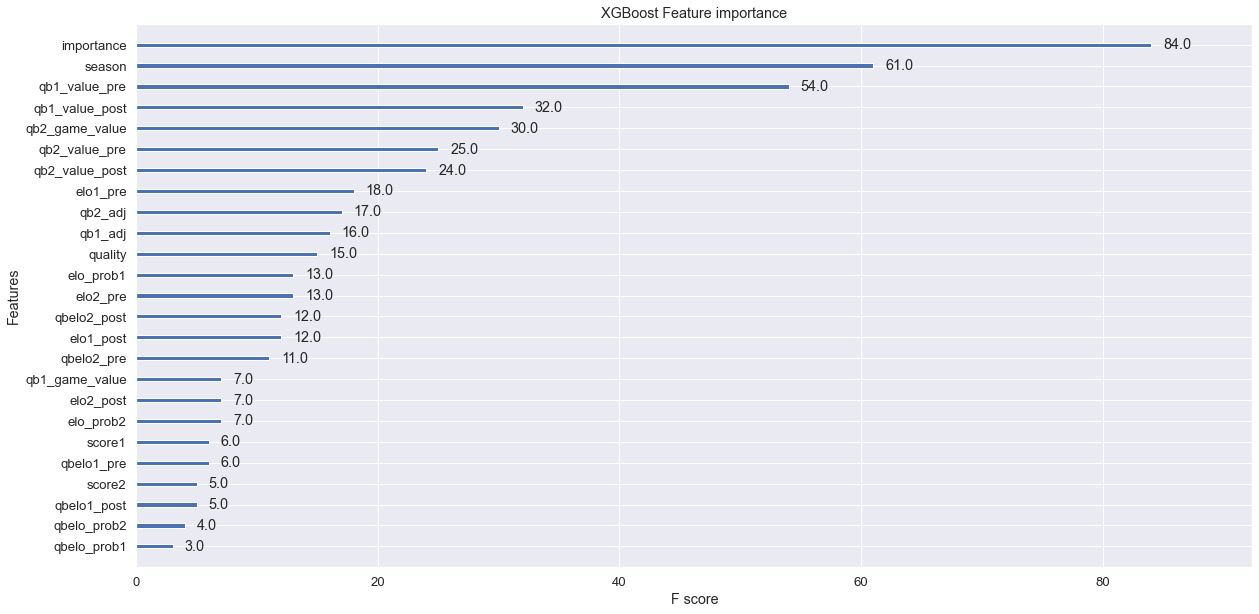

In [68]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax,title='XGBoost Feature importance')
plt.show()

#### CROSS VALIDATION

In [69]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='neg_root_mean_squared_error')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.4s finished


In [70]:
cv.mean()

-4.450862083974473